In [1]:
import pandas as pd

In [2]:
file = 'data/jobs_4k.xls'

In [3]:
content = pd.read_excel(file)

In [4]:
content.head()

,id,positionName,district,stationname,jobNature,companyLabelList,industryField,salary,companySize,skillLables,createTime,companyFullName,workYear,education,positionAdvantage,url,detail,type
0,3,财务产品经理,海淀区,上地,全职,"['节日礼物', '年底双薪', '定期体检', '七险一金']","物流丨运输,软件开发",10k-15k,500-2000人,"['产品设计', '后台', 'B2B']",2020-05-15 15:10:02,北京福佑多多信息技术有限公司,1-3年,本科,福利待遇好、创业黑马、技术氛围好,https://www.lagou.com/jobs/7149613.html,岗位职责1、负责财务相关业务解决方案架构并主导与产品、技术等交付团队的对接，能够从完整的财务...,产品线
1,4,产品专家,海淀区,中关村,全职,"['五险一金', '弹性工作', '带薪年假', '免费两餐']",企业服务,30k-50k,500-2000人,[],2020-05-16 08:23:06,北京拉勾网络技术有限公司,5-10年,本科,做好产品，给用户用,https://www.lagou.com/jobs/7056930.html,负责具体产品线的工作，完成用户价值。解决具体产品线的问题。产品线有策略、运营、基础产品流程等线,产品线
2,5,产品总监,海淀区,中关村,全职,"['五险一金', '弹性工作', '带薪年假', '免费两餐']",企业服务,40k-75k,500-2000人,[],2020-05-16 08:23:06,北京拉勾网络技术有限公司,5-10年,本科,做好产品，给用户用,https://www.lagou.com/jobs/6982266.html,做出好产品，服务用户，实现用户价值。B端产品、C端产品、商业策略产品、运营产品等岗位，都有总...,产品线
3,6,联盟广告产品运营专家/专员-【商业化】,海淀区,东单,全职,"['股票期权', '弹性工作', '定期体检', '岗位晋升']",文娱丨内容,20k-40k,2000人以上,['产品运营'],2020-05-15 19:35:13,北京达佳互联信息技术有限公司,5-10年,不限,扁平化管理 免费午餐晚餐下午茶,https://www.lagou.com/jobs/7112346.html,职位描述：1、负责快手联盟竞价广告的落地和运营，提升产品使用率和覆盖率； 2、深度分析广告预...,产品线
4,7,产品总监,海淀区,中关村,全职,"['领导好', '五险一金', '领军企业', '脑力密集型']","移动互联网,社交",20k-38k,15-50人,"['电商', '社交电商', '产品策划', '需求分析']",2020-05-16 09:15:16,北京领主科技有限公司,5-10年,本科,发展，创新,https://www.lagou.com/jobs/6864122.html,工作职责:1. 整体负责公司的产品功能规划、优化升级、实施工作； 2. 带领产品团队完成产品...,产品线


In [5]:
position_names = content['positionName'].tolist()

In [6]:
skill_lables = content['skillLables'].tolist()

In [7]:
len(position_names)

4511

In [8]:
len(skill_lables)

4511

## Build Graph

In [88]:
from collections import defaultdict

In [100]:
skill_position_graph = defaultdict(list)

In [101]:
for p, s in zip(position_names, skill_lables):
    skill_position_graph[p] += eval(s)

In [103]:
len(skill_position_graph)

1411

In [104]:
import networkx as nx

In [105]:
G = nx.Graph(skill_position_graph)

In [106]:
%matplotlib inline

In [107]:
import matplotlib.pyplot as plt

In [108]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [109]:
import random 

## 以30个随机选取的工作岗位为例

In [171]:
sample_nodes = random.sample(position_names, k=30)

In [172]:
sample_nodes_connections = sample_nodes

In [173]:
for p, skills in skill_position_graph.items():
    if p in sample_nodes: 
        sample_nodes_connections += skills

In [174]:
sample_graph = G.subgraph(sample_nodes_connections)

In [175]:
f = plt.figure(figsize=(50, 30))

<Figure size 3600x2160 with 0 Axes>

In [176]:
pos=nx.spring_layout(sample_graph, k=1)

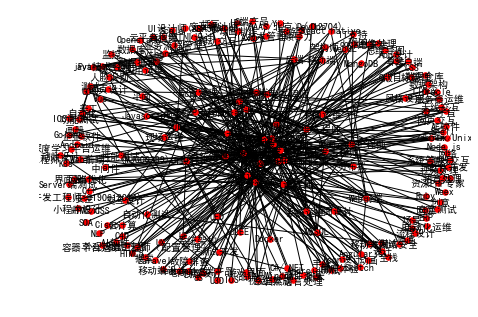

In [177]:
nx.draw(sample_graph, pos, with_labels=True, node_size=30, font_size=10)

In [178]:
nx.draw(sample_graph, pos, with_labels=True, node_size=40, font_size=30,  ax=f.add_subplot(111))

In [179]:
f.savefig('job-connections.png', dpi=180)

/Users/gaominquan/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


In [180]:
!ls

CoreCapacityAnalysis.ipynb job-connections.png
data


## Using PageRank get Kernel Abaility and Kernel Position

In [181]:
pr = nx.pagerank(G, alpha=0.9)

In [185]:
ranked_position_and_ability = sorted([(name, value) for name, value in pr.items()], 
                                     key=lambda x: x[1],
                                    reverse=True)

## AbilityRank -> 基于PageRank思想，计算每个技能点引发出来的工作岗位多少

In [186]:
ranked_position_and_ability

[('后端', 0.026833573370768898),
 ('运维', 0.0191279829833669),
 ('Python', 0.01716937562136133),
 ('PHP', 0.015217301132452196),
 ('Java', 0.015099988114363864),
 ('UI', 0.013501957339680843),
 ('产品经理', 0.012867362096047103),
 ('测试', 0.012366790452249686),
 ('交互', 0.009849405953488204),
 ('MySQL', 0.00967223844507533),
 ('服务器端', 0.009370964487301778),
 ('产品设计', 0.008597505637826748),
 ('数据分析', 0.007174969488981874),
 ('前端开发', 0.00608539791307318),
 ('Linux', 0.005226181617999156),
 ('Linux/Unix', 0.0049532559996417515),
 ('测试开发', 0.004835194902631713),
 ('Javascript', 0.004783639914662887),
 ('视觉', 0.004716109056529597),
 ('java开发工程师', 0.004700067816776761),
 ('GO', 0.004665757462546789),
 ('Web前端', 0.004611833602838623),
 ('运维工程师', 0.0043469981091009986),
 ('测试工程师', 0.00431809809115629),
 ('ui设计师', 0.004238235625166821),
 ('功能测试', 0.004037991593330988),
 ('产品总监', 0.003940470794231084),
 ('Golang', 0.003927858764196972),
 ('自动化', 0.0038575443596511397),
 ('UE', 0.0037940387389006924),
 ('

### 根据计算结果，最容易找到工作的技能分别是 “后端”，“运维”，“Python”，“PHP”，“Java”，“UI”和“产品经理”